<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/4_resnet/10)%20Comparing%20a%20resnet%20network%20across%20backend%20-%20mxnet%2C%20pytorch%20and%20keras%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals



### Train classifier using resnet in different backends - mxnet, pytorch, and keras 

# What is resnet

## Readings on resnet

  1) Points from https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035
    - The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers
    - The deeper model should not produce a training error higher than its shallower counterparts.
    - solves the problem of vanishing gradiens as network depth increased - https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257
    
    
 
  2) Points from https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624
    - Won 1st place in the ILSVRC 2015 classification competition with top-5 error rate of 3.57% (An ensemble model)
    - Efficiently trained networks with 100 layers and 1000 layers also.
    - Replacing VGG-16 layers in Faster R-CNN with ResNet-101. They observed a relative improvements of 28%
    

  3) Read more here
    - https://arxiv.org/abs/1512.03385
    - https://d2l.ai/chapter_convolutional-modern/resnet.html
    - https://cv-tricks.com/keras/understand-implement-resnets/
    - https://mc.ai/resnet-architecture-explained/


# Table of Contents


## [Install](#0)


## [Train and validate resnet50 base architecture in mxnet backend](#1)


## [Train and validate resnet50 base architecture in pytorch backend](#2)


## [Train and validate resnet50 base architecture in keras backend](#3)


## [Compare all experiments](#4)

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

## Dataset - Food or No-Food Classification
    - https://www.kaggle.com/trolukovich/food5k-image-dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ndNsGWFLGj5RunTz_X-73BthJgdyLQBT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ndNsGWFLGj5RunTz_X-73BthJgdyLQBT" -O food5k.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq food5k.zip

# Imports

In [ ]:
#Using mxnet-gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");

<a id='1'></a>
# Load experiment with resnet-40 base architecture in mxnet backend

In [3]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

In [4]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-50-backends", "using-mxnet");


# Insert data and set params in default mode
gtf.Default(dataset_path="food5k/training", 
            model_name="resnet50_v1", 
            freeze_base_network=False,
            num_epochs=5);

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-resnet-50-backends
    Experiment: using-mxnet
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-mxnet/

Dataset Details
    Train path:     food5k/training
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 2100
    Num val images:   900
    Num classes:      2

Model Params
    Model na

monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [5]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.896, Train-loss: 0.253 | Val-acc: 0.931111, Val-loss: 0.167, | time: 33.9 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.944, Train-loss: 0.134 | Val-acc: 0.951111, Val-loss: 0.137, | time: 33.6 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.969, Train-loss: 0.077 | Val-acc: 0.955556, Val-loss: 0.108, | time: 36.5 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.987, Train-loss: 0.041 | Val-acc: 0.968889, Val-loss: 0.088, | time: 35.7 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.994, Train-loss: 0.025 | Val-acc: 0.970000, Val-loss: 0.077, | time: 34.9 sec

    Training completed in: 2m 53s
    Best val Acc:          0.970000

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-mxnet/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-mxnet/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training l

<Figure size 432x288 with 0 Axes>

In [6]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-50-backends", "using-mxnet", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="food5k/validation");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-resnet-50-backends/using-mxnet/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-resnet-50-backends
    Experiment: using-mxnet
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-mxnet/

Dataset Details
    Test path:      food5k/validation
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 1000
    Num classes:      2

Testing



    Result
        class based accuracies
            0. food - 97.39999999999999 %
            1. non_food - 98.0 %
        total images:            1000
        num correct predictions: 977
        Average accuracy (%):    97.7



<a id='2'></a>
# Load experiment with resnet-50 base architecture in pytorch backend

In [7]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [8]:
#Using pytorch backend 
from pytorch_prototype import prototype

In [9]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-50-backends", "using-pytorch");


# Insert data and set params in default mode
gtf.Default(dataset_path="food5k/training", 
            model_name="resnet50", 
            freeze_base_network=False,
            num_epochs=5);

Pytorch Version: 1.2.0

Experiment Details
    Project: Compare-resnet-50-backends
    Experiment: using-pytorch
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-pytorch/

Dataset Details
    Train path:     food5k/training
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 2100
    Num val images:   900
    Num classes:      2

Model Params
    Model

In [10]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.869, Train-loss: 0.389 | Val-acc: 0.952222, Val-loss: 0.134, | time: 34.1 sec

    Epoch 2/5
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.902, Train-loss: 0.278 | Val-acc: 0.971111, Val-loss: 0.091, | time: 34.1 sec

    Epoch 3/5
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.939, Train-loss: 0.178 | Val-acc: 0.981111, Val-loss: 0.053, | time: 34.8 sec

    Epoch 4/5
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.950, Train-loss: 0.147 | Val-acc: 0.986667, Val-loss: 0.043, | time: 34.8 sec

    Epoch 5/5
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.975, Train-loss: 0.066 | Val-acc: 0.983333, Val-loss: 0.042, | time: 34.9 sec

    Training completed in: 2m 50s
    Best val Acc:          0.986667

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-pytorch/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-pytorch/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history 

<Figure size 432x288 with 0 Axes>

In [11]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-50-backends", "using-pytorch", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="food5k/validation");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Pytorch Version: 1.2.0

Model Details
    Loading model - workspace/Compare-resnet-50-backends/using-pytorch/output/models/final
    Model loaded!

Experiment Details
    Project: Compare-resnet-50-backends
    Experiment: using-pytorch
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-pytorch/

Dataset Details
    Test path:     food5k/validation
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 1000
    Num classes:      2

Testing



    Result
        class based accuracies
            0. food - 98.2 %
            1. non_food - 99.0 %
        total images:            1000
        num correct predictions: 986
        Average accuracy (%):    98.6



<a id='3'></a>
# Load experiment with resnet-50 base architecture in keras backend

In [12]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [13]:
#Using keras backend 
from keras_prototype import prototype

In [14]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-50-backends", "using-keras");


# Insert data and set params in default mode
gtf.Default(dataset_path="food5k/training", 
            model_name="resnet50", 
            freeze_base_network=False,
            num_epochs=5);

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Compare-resnet-50-backends
    Experiment: using-keras
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-keras/

Dataset Details
    Train path:     food5k/training
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 2100 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 2100
    Num val image

In [15]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
525/525 [==============================] - 58s 111ms/step - loss: 0.3707 - acc: 0.8333 - val_loss: 0.1863 - val_acc: 0.9333

Epoch 00001: saving model to workspace/Compare-resnet-50-backends/using-keras/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 0.18635, saving model to workspace/Compare-resnet-50-backends/using-keras/output/models/best_model.h5

Epoch 00001: saving model to workspace/Compare-resnet-50-backends/using-keras/output/models/intermediate_model_01.h5
Epoch 2/5
525/525 [==============================] - 51s 97ms/step - loss: 0.2165 - acc: 0.9143 - val_loss: 0.1345 - val_acc: 0.9522

Epoch 00002: saving model to workspace/Compare-resnet-50-backends/using-keras/output/models/resume_state.h5

Epoch 00002: val_loss improved from 0.18635 to 0.13455, saving model to workspace/Compare-resnet-50-backends/using-keras/output/models/best_model.h5

Epoch 00002: saving model to workspace/Compare-resnet-50-backends/using-keras/output/

<Figure size 432x288 with 0 Axes>

In [17]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-50-backends", "using-keras", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="food5k/validation");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/Compare-resnet-50-backends/using-keras/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Compare-resnet-50-backends
    Experiment: using-keras
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-50-backends/using-keras/

Dataset Details
    Test path:     food5k/validation
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Found 1000 images belonging to 2 classes.
Pre-Composed Test Transforms
[{'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num test images: 1000
    Num classes:      2

Testing
1000/1000 [==============================] - 17s 17ms/step

    Result
        class based accuracies
            0. food - 98.2 %
            1. non_food - 98.4 %
        total i

<a id='11'></a>
# Comparing all the experiments

In [18]:
# Invoke the comparison class
from monk.compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [19]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-backend");

Comparison: - Compare-effect-of-backend


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-backend
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [20]:
gtf.Add_Experiment("Compare-resnet-50-backends", "using-mxnet");
gtf.Add_Experiment("Compare-resnet-50-backends", "using-pytorch");
gtf.Add_Experiment("Compare-resnet-50-backends", "using-keras");

Project - Compare-resnet-50-backends, Experiment - using-mxnet added
Project - Compare-resnet-50-backends, Experiment - using-pytorch added
Project - Compare-resnet-50-backends, Experiment - using-keras added


## Run Analysis

In [21]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

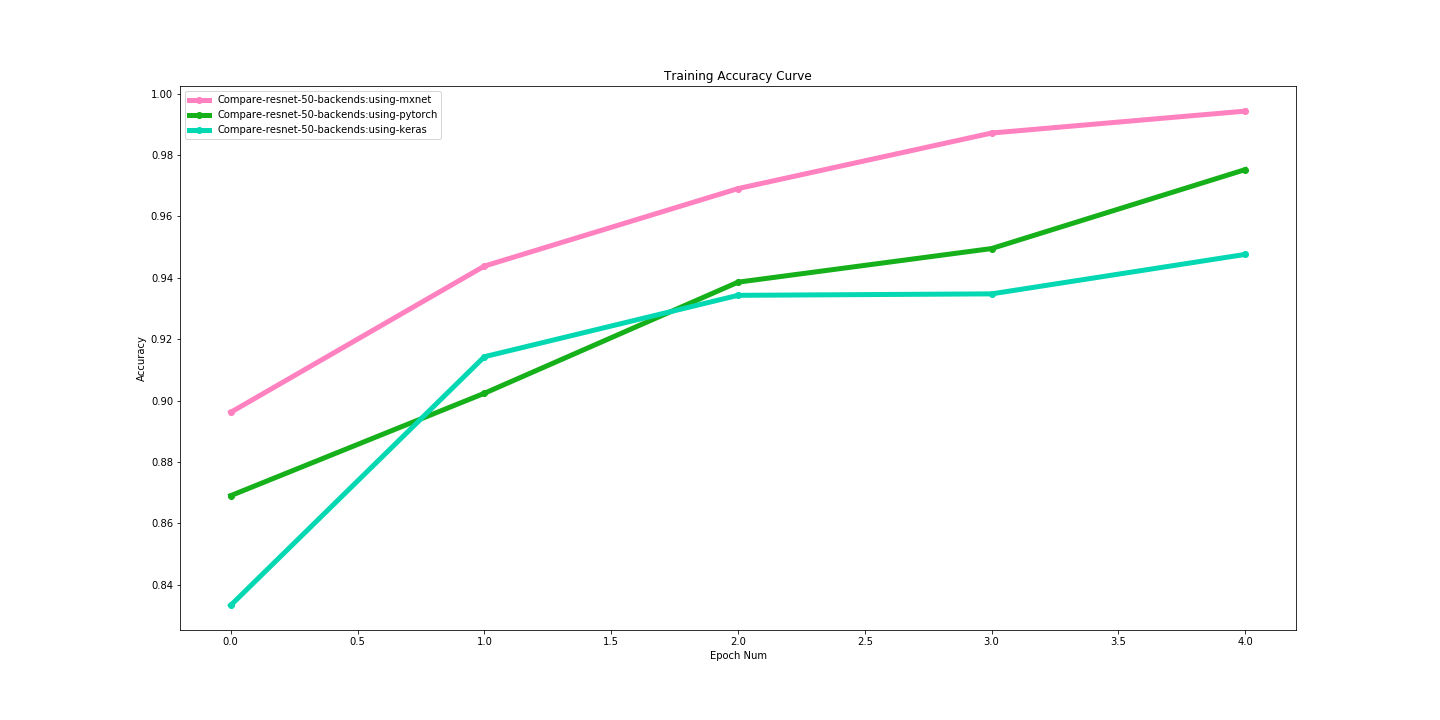

In [22]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/train_accuracy.png") 

### Training Loss Curves

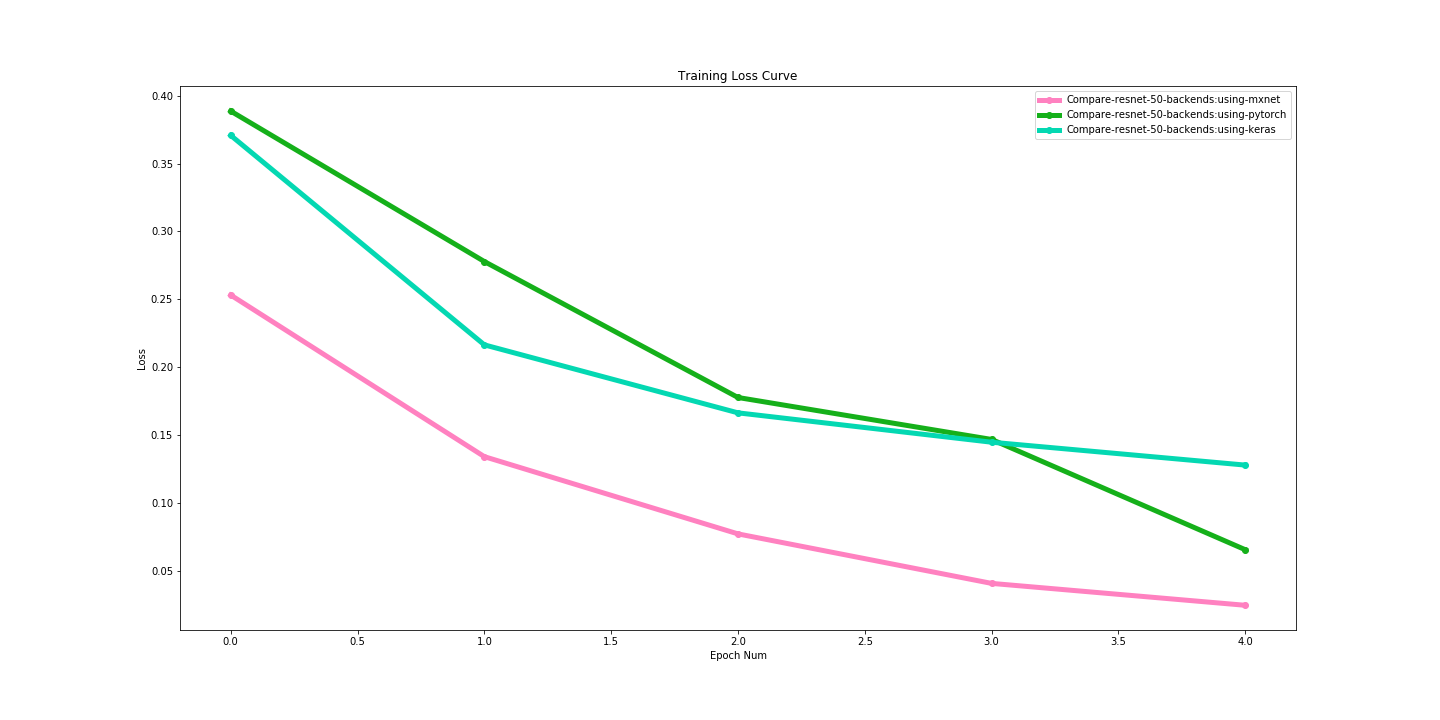

In [23]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/train_loss.png") 

### Validation Accuracy Curves

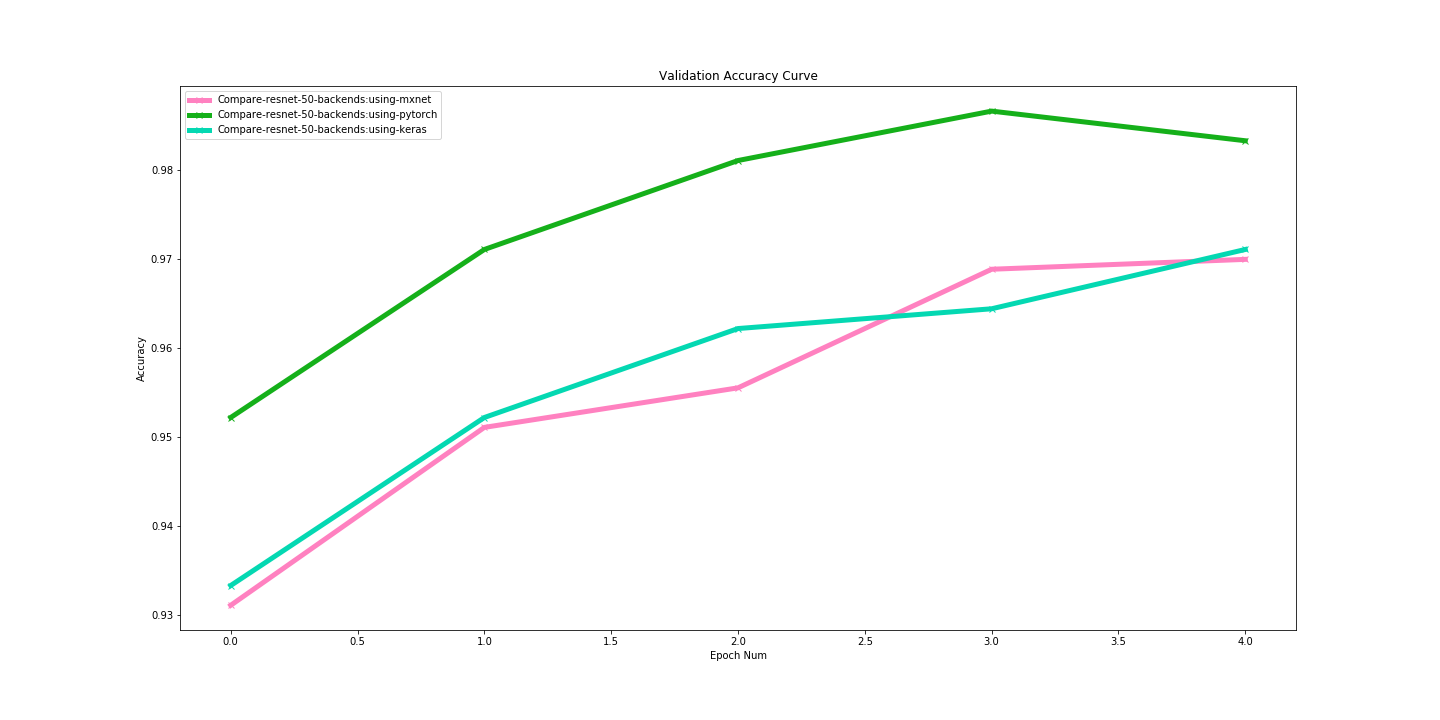

In [24]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/val_accuracy.png") 

### Validation loss curves

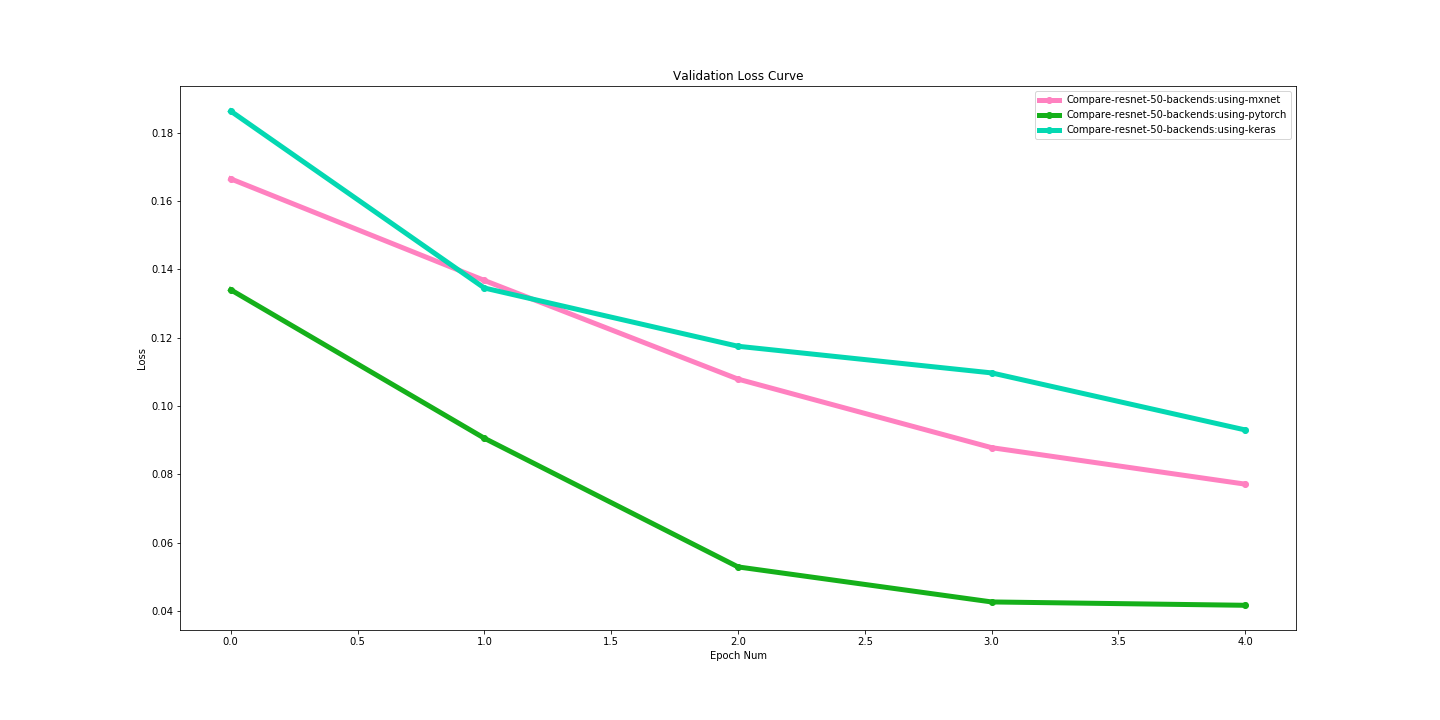

In [25]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/val_loss.png") 

### Training Times and max gpu usages

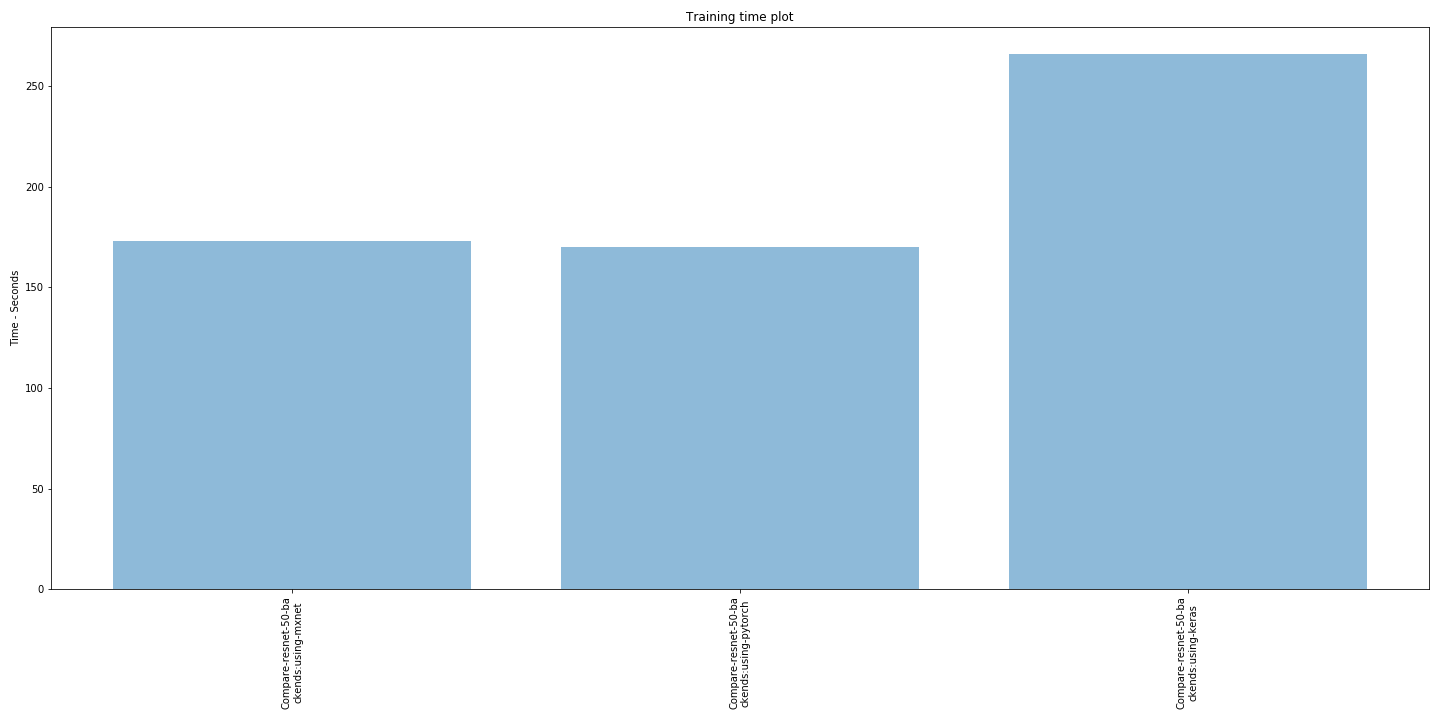

In [26]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/stats_training_time.png") 

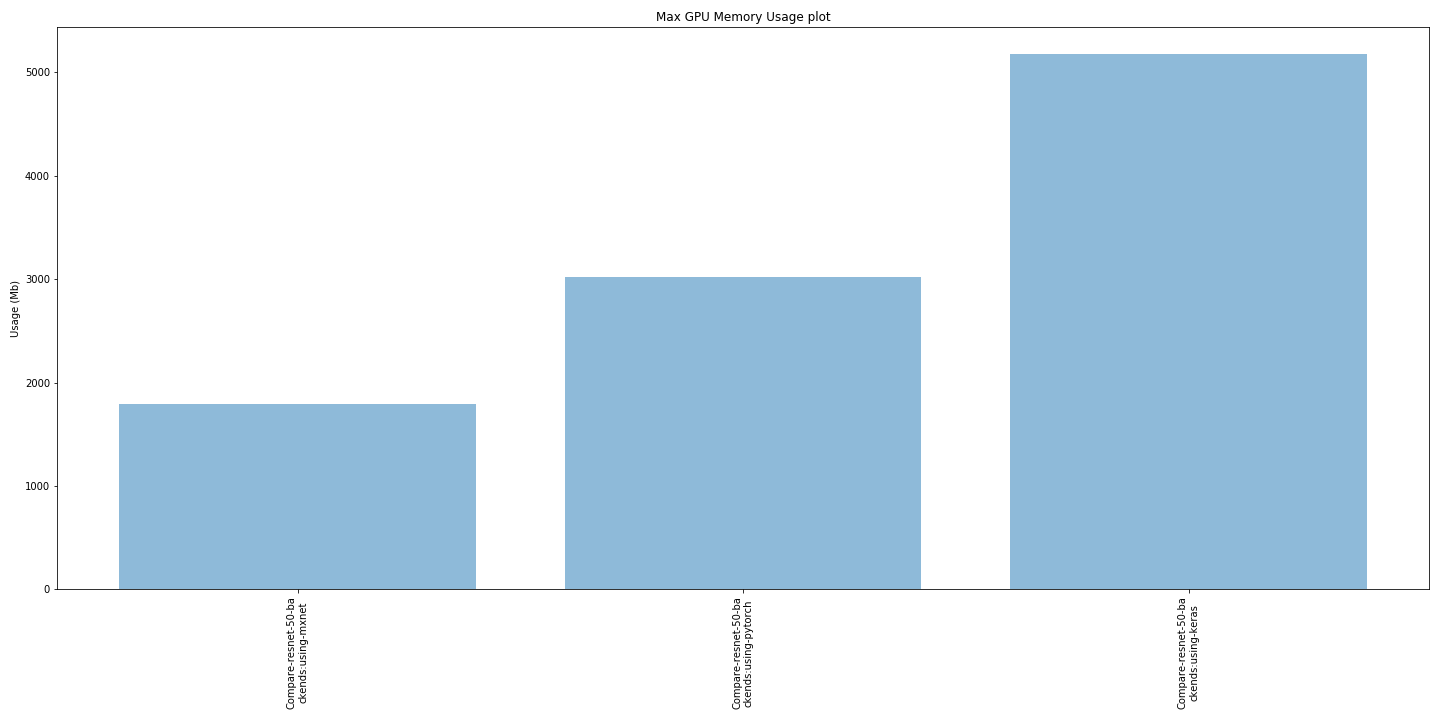

In [27]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-backend/stats_max_gpu_usage.png") 

# Comparisons 
#### You may get differet results

    Backend  |   Val Acc   | Training time (sec)  |  Gpu Usage (mb)   
    
    
    mxnet    |    97.7     |        175           |       1800
    
    
    
    pytorch  |    98.6     |        170           |       3000
    
    
    
    
    keras    |    98.3     |        275           |       5200
    
    
    
    

# Goals - Completed


### Train classifier using resnet in different backends - mxnet, pytorch, and keras 